<a href="https://colab.research.google.com/github/rocket0l4/Function-Transform/blob/main/About_Functions_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv('/content/drive/MyDrive/train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.sample(5)

,Survived,Age,Fare
119,0,2.0,31.2750
664,1,20.0,7.9250
865,1,42.0,13.0000
430,1,28.0,26.5500
532,0,17.0,7.2292


In [26]:
def apply_transform(transform):
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],
                          remainder = 'passthrough')
  X_trans = trf.fit_transform(X)

  # Impute missing values in 'Fare' column before transformation
  imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean
  X_trans = imputer.fit_transform(X_trans)

  clf = LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv = 10)))

  plt.figure(figsize = (14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'],dist="norm",plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0],dist="norm",plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accuracy 0.61729088639201


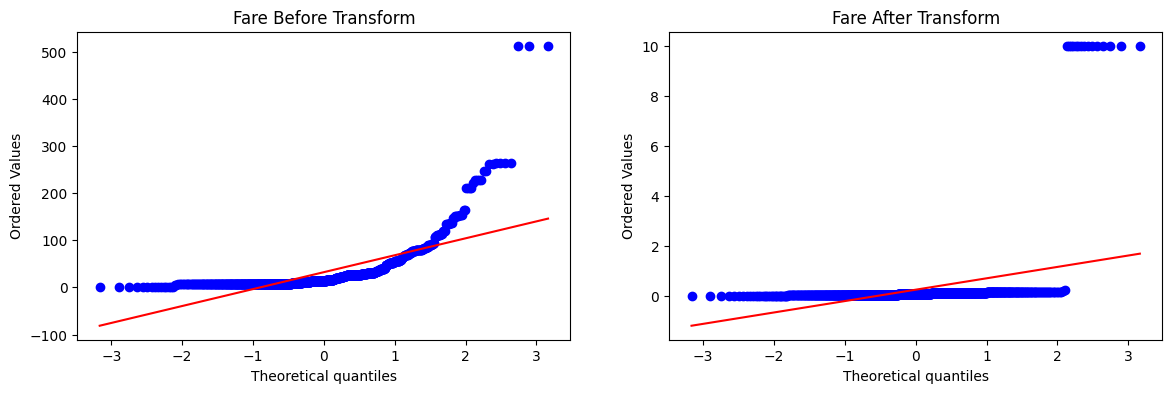

In [32]:
apply_transform(lambda x: 1/(x+0.1))